Epoch 1/100
69/69 [==============================] - 24s 227ms/step - loss: 0.0503 - mean_absolute_error: 0.1602
Epoch 2/100
69/69 [==============================] - 15s 224ms/step - loss: 0.0234 - mean_absolute_error: 0.1180
Epoch 3/100
69/69 [==============================] - 16s 232ms/step - loss: 0.0220 - mean_absolute_error: 0.1126
Epoch 4/100
69/69 [==============================] - 16s 236ms/step - loss: 0.0210 - mean_absolute_error: 0.1110
Epoch 5/100
69/69 [==============================] - 21s 302ms/step - loss: 0.0203 - mean_absolute_error: 0.1088
Epoch 6/100
69/69 [==============================] - 18s 266ms/step - loss: 0.0194 - mean_absolute_error: 0.1063
Epoch 7/100
69/69 [==============================] - 19s 273ms/step - loss: 0.0182 - mean_absolute_error: 0.1018
Epoch 8/100
69/69 [==============================] - 18s 267ms/step - loss: 0.0191 - mean_absolute_error: 0.1042
Epoch 9/100
69/69 [==============================] - 18s 267ms/step - loss: 0.0175 - mean_absolu

Epoch 73/100
69/69 [==============================] - 19s 274ms/step - loss: 0.0148 - mean_absolute_error: 0.0926
Epoch 74/100
69/69 [==============================] - 18s 264ms/step - loss: 0.0152 - mean_absolute_error: 0.0931
Epoch 75/100
69/69 [==============================] - 21s 302ms/step - loss: 0.0150 - mean_absolute_error: 0.0912
Epoch 76/100
69/69 [==============================] - 17s 251ms/step - loss: 0.0157 - mean_absolute_error: 0.0949
Epoch 77/100
69/69 [==============================] - 21s 306ms/step - loss: 0.0155 - mean_absolute_error: 0.0931
Epoch 78/100
69/69 [==============================] - 23s 333ms/step - loss: 0.0158 - mean_absolute_error: 0.0946
Epoch 79/100
69/69 [==============================] - 19s 269ms/step - loss: 0.0152 - mean_absolute_error: 0.0934
Epoch 80/100
69/69 [==============================] - 25s 358ms/step - loss: 0.0150 - mean_absolute_error: 0.0924
Epoch 81/100
69/69 [==============================] - 19s 268ms/step - loss: 0.0151 - me

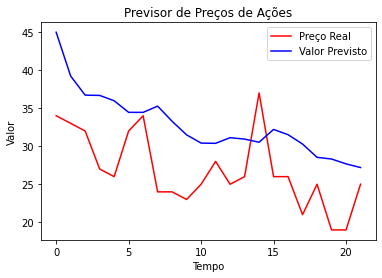

In [20]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM
import matplotlib.pyplot as plt

base = pd.read_csv('loaded_m_3330.csv')[:-22]
base = base.dropna()
base_treino = base.iloc[:, 1:2].values
normalizador = MinMaxScaler(feature_range = (0,1))
base_treino_normalizada = normalizador.fit_transform(base_treino)

previsores = []
preco_real = []

for i in range(90,2282):
    previsores.append(base_treino_normalizada[i-90:i,0])
    preco_real.append(base_treino_normalizada[i,0])
    
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores,(previsores.shape[0], previsores.shape[1],1))

regressor = Sequential()
regressor.add(LSTM(units = 100,
                   return_sequences = True,
                   input_shape = (previsores.shape[1],1)))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50,
                   return_sequences = True,))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))
regressor.add(Dense(units = 1,
                    activation = 'linear'))
regressor.compile(optimizer = 'rmsprop',
                  loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores,
              preco_real,
              epochs = 100,
              batch_size = 32)

base_teste = pd.read_csv('loaded_m_3330.csv')[-22:]
preco_real_teste = base_teste.iloc[:, 1:2].values
base_completa = pd.concat((base['cpu'], base_teste['cpu']), axis = 0)

entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1,1)
entradas = normalizador.transform(entradas)

previsores_teste = []
for j in range(90,112):
    previsores_teste.append(entradas[j-90:j, 0])
previsores_teste = np.array(previsores_teste)
previsores_teste = np.reshape(previsores_teste,
                              (previsores_teste.shape[0],
                               previsores_teste.shape[1],
                               1))
previsores_teste = regressor.predict(previsores_teste)
previsores_teste = normalizador.inverse_transform(previsores_teste)
previsores_teste.mean()
preco_real_teste.mean()

plt.plot(preco_real_teste,
         color = 'red',
         label = 'Valor Real')
plt.plot(previsores_teste,
         color = 'blue',
         label = 'Valor Previsto')
plt.title('Previsor de Valores')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()